## P9.3.1
-----

C:\Users\Arjun Sarao\AppData\Local\Temp\ipykernel_76204\2057034601.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


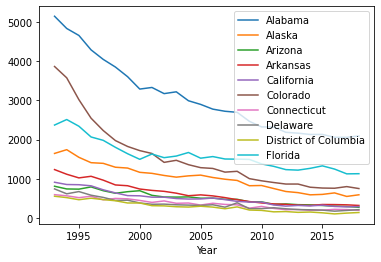

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    filepath_or_buffer="C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/tb-cases.txt",
    sep="\t",
    skipfooter=21,
    usecols=("State", "Year", "Cases"),
    engine="python",
)
df = df[df["Year"].notna()]
df["Year"] = df["Year"].astype(int)

df.index = pd.MultiIndex.from_frame(df[["State", "Year"]])
df = df.drop("State", axis=1)
df = df.drop("Year", axis=1)

cases_1993 = df.xs(1993, level=1)
cases_2018 = df.xs(2018, level=1)

r = (cases_2018 - cases_1993) / cases_1993 * 100
r.loc[r.idxmin()]

fig, ax = plt.subplots()
df2 = df.unstack(level=0)
idx = df2.max() >= 500
df2.T[idx].T.plot(ax=ax)
ax.legend(df2.columns.get_level_values("State"))
plt.show()


## P9.3.2
-----

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

populations = pd.read_csv(
    filepath_or_buffer="C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/US-populations.txt",
    index_col=0,
)

print(
    f"The most populous state in 2019 is: {populations['2019'].sort_values(ascending=False).index[0]}"
)

print(
    f"The least populous state in 2019 is: {populations['2019'].sort_values(ascending=True).index[0]}"
)

df = pd.read_csv(
    filepath_or_buffer="C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/tb-cases.txt",
    sep="\t",
    skipfooter=21,
    usecols=("State", "Year", "Cases"),
    engine="python",
)
df = df[df["Year"] == 2018]
df = df.set_index(df["State"]).drop(["State", "Year"], axis=1)
df["pops"] = populations["2018"]
df["TB prevalence per million"] = df["Cases"] / df["pops"] * 1.0e6
print("Lowest and highest TB prevalence in 2018")
print(df["TB prevalence per million"].sort_values()[[0, -1]])


The most populous state in 2019 is: California
The least populous state in 2019 is: Wyoming
Lowest and highest TB prevalence in 2018
State
Wyoming     1.731299
Alaska     85.698079
Name: TB prevalence per million, dtype: float64
